In [16]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

# Set the path to the COCO annotations file
coco_dir = "F:\\ssl_images\\data\\coco"
annotations_path = os.path.join(coco_dir, "annotations", "instances_train2017.json")

# Load the annotations
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

# Get the list of category IDs and their names
categories = {cat['id']: cat['name'] for cat in annotations['categories']}

# Count the number of instances per category
instance_counts = Counter([ann['category_id'] for ann in annotations['annotations']])

# Top 10 most common categories
top_categories = instance_counts.most_common(10)
top_category_names = [categories[cat_id] for cat_id, _ in top_categories]
top_category_counts = [count for _, count in top_categories]

# Plotting the top 10 most common categories
plt.figure(figsize=(10, 6))
plt.barh(top_category_names[::-1], top_category_counts[::-1], color='skyblue')
plt.xlabel('Number of Instances')
plt.title('Top 10 Most Common Categories in COCO')
plt.gca().invert_yaxis()  # To have the highest category at the top
plt.show()

# Print the category statistics for the top categories
#print("Category Statistics:")
#for category_id, count in top_categories:
#    category_name = categories[category_id]
#    print(f"Category: {category_name} (ID {category_id}), Instances: {count}")

# Get the most common category combinations for each image
annotation_tuples = [
    tuple(sorted([ann['category_id'] for ann in annotations['annotations'] if ann['image_id'] == im['id']]))
    for im in annotations['images']
]

# Count co-occurrence of category combinations
category_co_occurrence = Counter(annotation_tuples)

# Top 10 most common category combinations
top_combos = category_co_occurrence.most_common(10)

# Print the most common category combinations
print("\nTop 10 Most Common Category Combinations:")
for combo, count in top_combos:
    combo_names = ", ".join([categories[cat_id] for cat_id in combo])
    print(f"{combo_names}: {count}")

# Plotting the top 10 most common category combinations
combo_names_list = [", ".join([categories[cat_id] for cat_id in combo]) for combo, _ in top_combos]
combo_counts = [count for _, count in top_combos]

plt.figure(figsize=(10, 6))
plt.barh(combo_names_list[::-1], combo_counts[::-1], color='lightgreen')
plt.xlabel('Number of Instances')
plt.title('Top 10 Most Common Category Combinations in COCO')
plt.gca().invert_yaxis()  # To have the most common combo at the top
plt.show()


KeyboardInterrupt: 

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
vehicle outdoor indoor furniture accessory kitchen sports food animal person electronic appliance


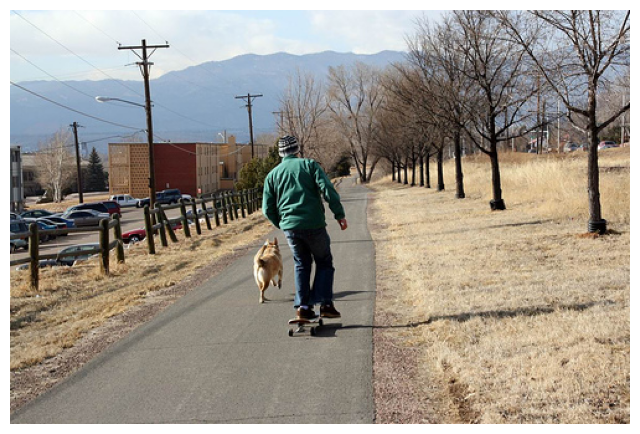

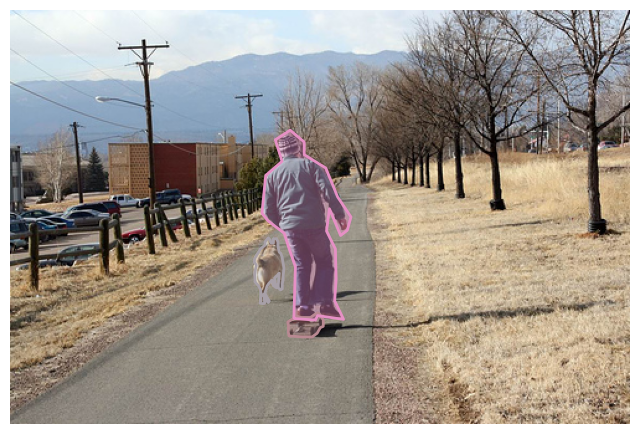

In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

dataDir='F:\\ssl_images\\data\\coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)



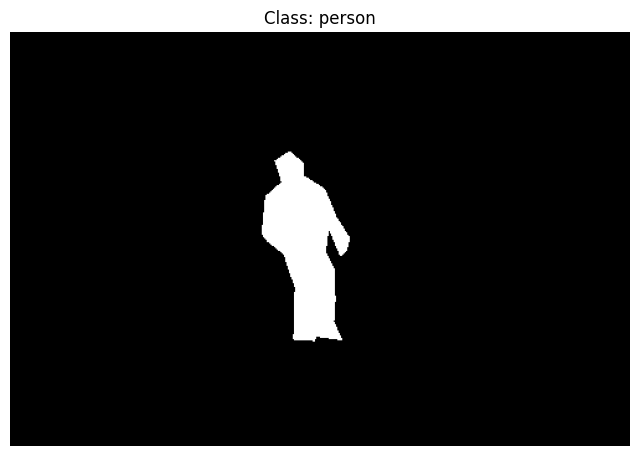

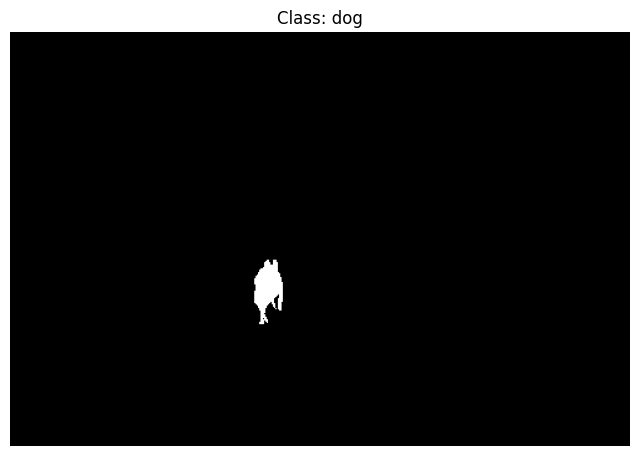

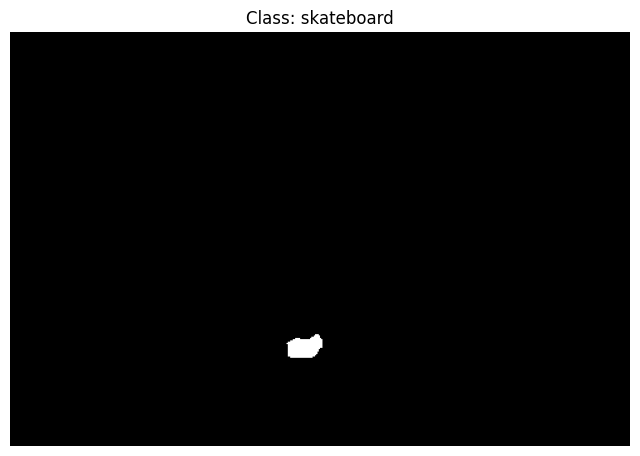

In [6]:
# Create a list of category names corresponding to the selected categories
cat_names = [cat['name'] for cat in coco.loadCats(catIds)]

# Initialize binary mask with zeros for each class (one per channel)
height, width, _ = I.shape
num_classes = len(catIds)  # Number of classes we're interested in
binary_masks = np.zeros((height, width, num_classes), dtype=np.uint8)

# Loop through each annotation and update the corresponding mask
for ann in anns:
    # Get the category ID for this annotation
    cat_id = ann['category_id']
    
    # Find the class index in catIds
    class_idx = catIds.index(cat_id)
    
    # Create a mask for this annotation
    mask = coco.annToMask(ann)
    
    # Add the mask to the binary mask for this class (use OR to accumulate masks)
    binary_masks[:, :, class_idx] = np.maximum(binary_masks[:, :, class_idx], mask)

# Display the binary masks for each class
for class_idx in range(num_classes):
    plt.imshow(binary_masks[:, :, class_idx], cmap='gray')
    plt.title(f'Class: {cat_names[class_idx]}')
    plt.axis('off')
    plt.show()


['person', 'car', 'chair', 'book', 'bottle', 'cup', 'dining table', 'traffic light', 'bowl', 'handbag']


C:\Users\gabri\AppData\Local\Temp\ipykernel_3628\499646411.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_category_names, y=top_counts, palette="viridis")


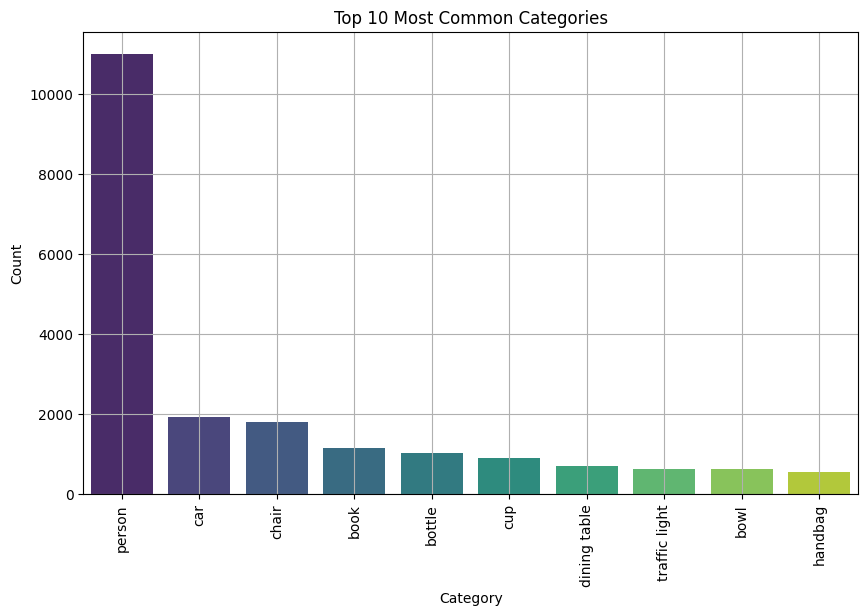

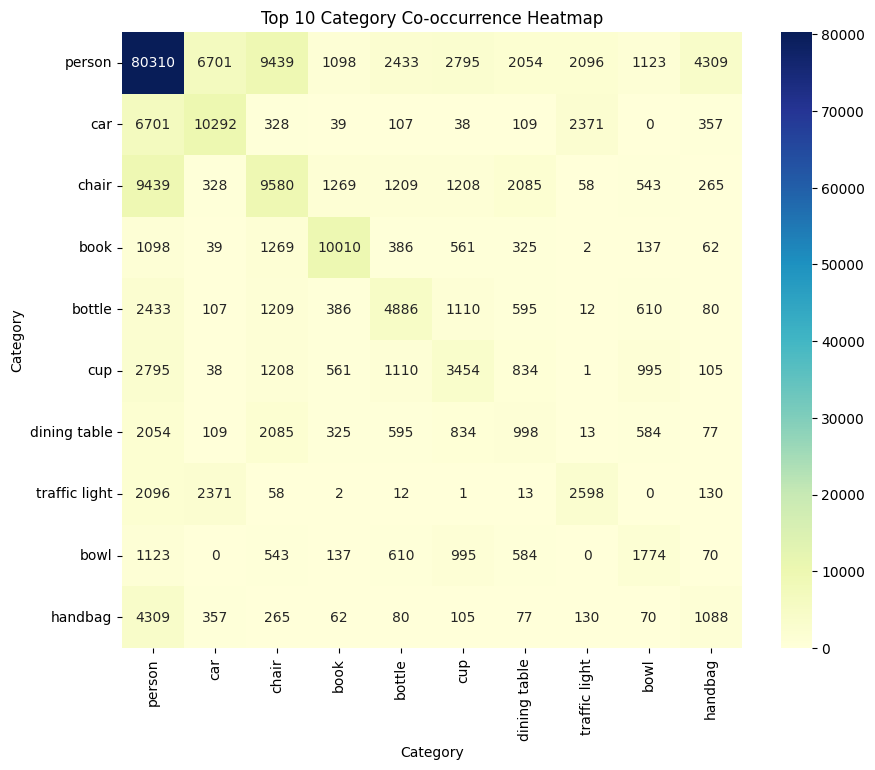

In [8]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def analyze_annotations(annotation_path):
    # Load the annotation JSON file
    with open(annotation_path, "r") as f:
        annotations = json.load(f)
    
    # Count occurrences of each category
    category_counts = Counter([ann["category_id"] for ann in annotations["annotations"]])
    
    # Get the top 10 most common categories
    top_categories = [cat_id for cat_id, _ in category_counts.most_common(10)]
    top_counts = [category_counts[cat_id] for cat_id in top_categories]
    
    # Map category IDs to names
    categories = annotations["categories"]
    category_names = {cat["id"]: cat["name"] for cat in categories if cat["id"] in top_categories}
    top_category_names = [category_names[cat_id] for cat_id in top_categories]
    print(top_category_names)
    # Plot category counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_category_names, y=top_counts, palette="viridis")
    plt.title("Top 10 Most Common Categories")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
    
    # Prepare co-occurrence matrix for the top 10 categories
    co_occurrence_matrix = np.zeros((10, 10), dtype=float)
    
    # Calculate co-occurrences for the top 10 categories
    filtered_annotations = [
        ann for ann in annotations["annotations"] if ann["category_id"] in top_categories
    ]
    for image_id in set(ann["image_id"] for ann in filtered_annotations):
        image_annotations = [
            ann["category_id"] for ann in filtered_annotations if ann["image_id"] == image_id
        ]
        for i, cat_id1 in enumerate(image_annotations):
            for cat_id2 in image_annotations[i + 1:]:
                idx1, idx2 = top_categories.index(cat_id1), top_categories.index(cat_id2)
                co_occurrence_matrix[idx1, idx2] += 1
                co_occurrence_matrix[idx2, idx1] += 1  # Symmetric matrix for co-occurrence
    
    # Plot co-occurrence heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        co_occurrence_matrix,
        xticklabels=top_category_names,
        yticklabels=top_category_names,
        cmap="YlGnBu",
        annot=True,
        fmt=".0f"
    )
    plt.title("Top 10 Category Co-occurrence Heatmap")
    plt.xlabel("Category")
    plt.ylabel("Category")
    plt.xticks(rotation=90)
    plt.show()

# Example usage:
analyze_annotations(os.path.join("F:\\ssl_images\\data", "coco", "annotations", "instances_val2017.json"))


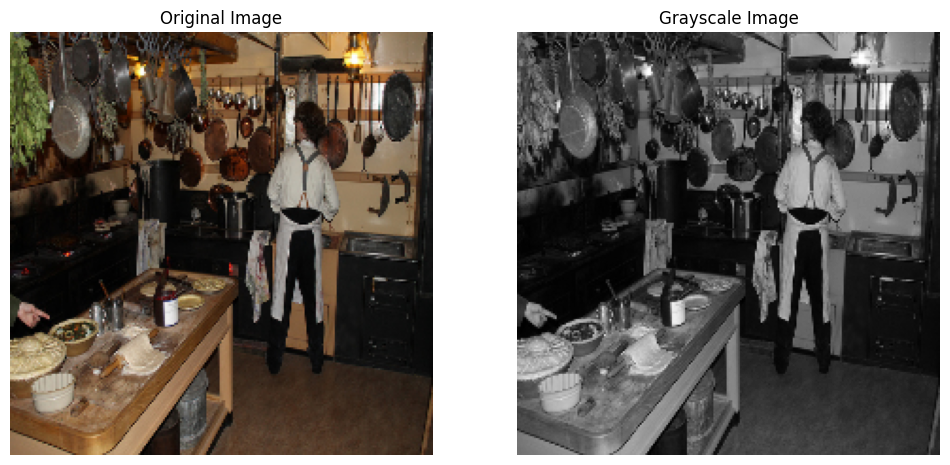

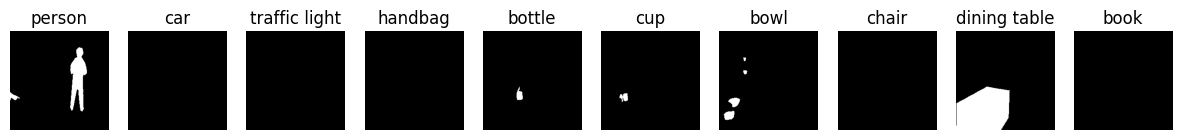

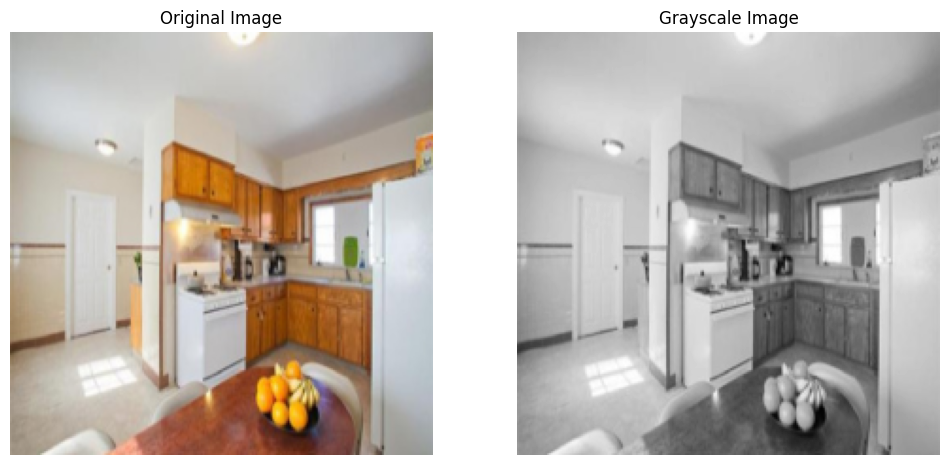

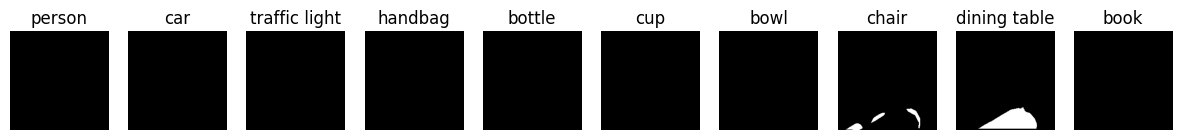

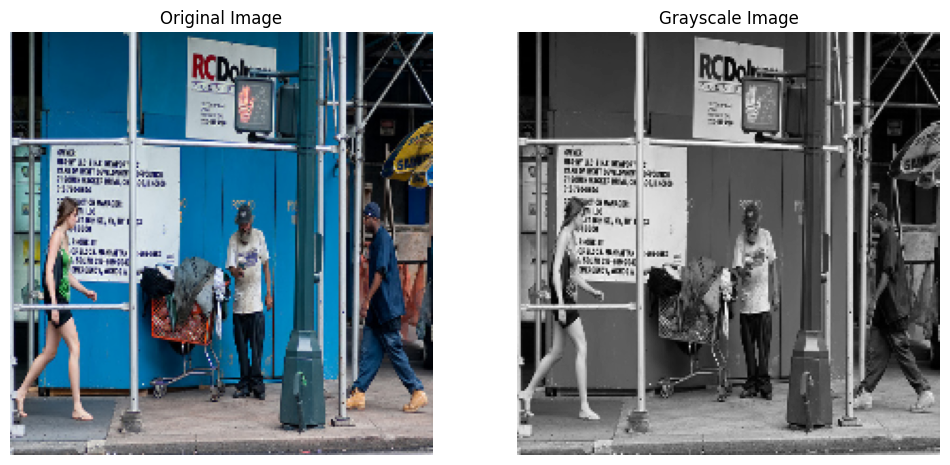

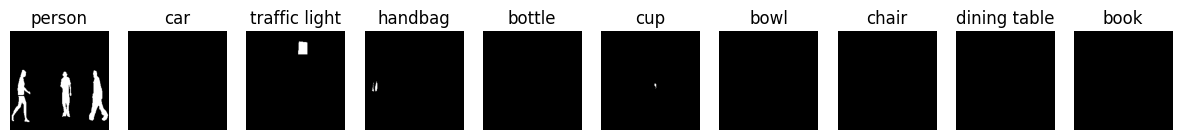

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load and plot images and masks from the preprocessed files
def load_and_plot_preprocessed_data(output_dir, sample_indices, cat_names):
    """
    Load and plot images, grayscale inputs, and masks from preprocessed files.

    Parameters:
    - output_dir: directory where processed files are stored.
    - sample_indices: list of sample indices to load and display.
    - cat_names: list of category names for plotting masks.
    """
    for idx in sample_indices:
        # Load image, grayscale input, and mask
        img_path = os.path.join(output_dir, f"image_{idx}.npy")
        gray_img_path = os.path.join(output_dir, f"inputgray_{idx}.npy")
        mask_path = os.path.join(output_dir, f"mask_{idx}.npy")

        img = np.load(img_path)
        gray_img = np.load(gray_img_path)
        binary_masks = np.load(mask_path)

        # Plot the RGB image and grayscale input image
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(img)
        ax[0].set_title("Original Image")
        ax[0].axis("off")
        
        ax[1].imshow(gray_img.squeeze(), cmap="gray")
        ax[1].set_title("Grayscale Image")
        ax[1].axis("off")
        
        plt.show()

        # Plot each binary mask with its category name
        num_classes = binary_masks.shape[-1]
        fig, axes = plt.subplots(1, num_classes, figsize=(15, 6))

        category_names = [
        "person", "car", "chair", "book", "bottle", 
        "cup", "dining table", "traffic light", "bowl", "handbag"
        ]
        catIds = coco.getCatIds(catNms=category_names)
        
        for class_idx in range(num_classes):
            ax = axes[class_idx]
            mask = binary_masks[:, :, class_idx]
            ax.imshow(mask, cmap="gray")
            ax.set_title(coco.loadCats(catIds[class_idx])[0]['name'])
            ax.axis("off")
        
        plt.show()

# Define parameters
output_dir = "F:\\ssl_images\\data\\processed\\coco\\segmentation\\train2017"
cat_names = ["person", "car", "chair", "book", "bottle", "cup", "dining table", "traffic light", "bowl", "handbag"]
sample_indices = [0, 1, 2]  # Modify this list to view specific samples

# Load and plot data
load_and_plot_preprocessed_data(output_dir, sample_indices, cat_names)
